# Evolutuonary algorithm to solve the n-queens problem

The following code aims to solve the n-queens problem using an evolutionary algorithm. 

I made this mainly to understand how this kind of algorithms work.

## Initialize the population

In [1]:
def initialization(n_population, n_queens):
    # Function to initialize the population. Each member of the population
    # is a candidate initialized randomly with a permutation of the number
    # of queens (N)
    population = [np.random.permutation(n_queens)]
    for i in range(n_population-1):
        population = np.concatenate((population, [np.random.permutation(n_queens)]))
    return population

## Define the evaluation function (fitness function)

In [2]:
def is_attacking(x1, y1, x2, y2):
    # It returns true if 2 Queens are attacking each other.
    # The representation of the problem assumes that each index of the N-array 
    # is each column of the board and that the value inside the index is the
    # position of the queen counting the rows.
    # Two queens attack each other if they are in the same diagonal => the difference
    # of their absolute positions is equal |x1-x2| = |y1-y2| 
    # or if they are in the positions of the board with distance 
    #1 or less with respect to the reference queen.
    return (abs(x1-x2) == abs(y1-y2)) or (abs(x1-x2) <= 1 and abs(y1-y2) <= 1)

def fitness_function(population):
    # The fitness will be defined as the numbers of queens in the board that
    # are attacking to each other. They attack each other if they are placed in the
    # same diagonal or in the squares of the board at distance 1 or less.
    fitness = np.zeros(len(population))
    for r in range(len(population)):
        rows = population[r]
        # Compare each queen with the others and store how many are attacking each other
        # in the fitness array
        for i in range(len(rows)-1):
            for j in range(i+1, len(rows)):
                fitness[r] += 1 if is_attacking(i, rows[i], j, rows[j]) else 0
    return fitness

## Parent selection

In [3]:
def select_gen(population):
    # Select the best genes out of 5 randomly picked up to do crossover
    # and then generate their children
    random_parents = np.random.randint(len(population), size=5)
    # this function returns the 2 best genes (parents) out of the 5 randomly sampled
    # first it gets the parents with smallest fitness
    # second it gets its indexes in the population
    # finally it returns their genes
    return population[random_parents[fitness[random_parents].argsort()[:2]]]

## Recombination

In [4]:
def recombinate_gen(gen_1, gen_2):
    # It applies recombination to a pair of genes
    # The algorithm assumes gen_1 is the one we are recombining
    # and that gen_1 and gen_2 are matrices with 2 components:
    # the first part of the gen after splitting it from the
    # crossover point
    
    def add_queen(gen, new_gen):
        # Private auxiliary function to minimize the code.
        # It appends to a given gen the values obtained with
        # the recombination
        for queen in gen:
            if not queen in new_gen:
                new_gen = np.append(new_gen, queen)
        return new_gen
            
    new_gen = gen_1[0]
    # Analize the gen after the crossover point [1] then
    # the first part of the gen [0]
    new_gen = add_queen(gen_2[1], new_gen)
    new_gen = add_queen(gen_2[0], new_gen)
    return new_gen

def recombination(pair, n_queens):
    # It recombines a pair of genes (parents) to generate their childrens
    # In order to do so it splits each parent in 2 halfs in a crossover point
    # then it combinates the halfs of 1 and 2 to generate two new children
    crossover_point = np.random.randint(n_queens)
    
    # split parents in 2 parts by the crossover point
    gen_1 = np.hsplit(pair[0], [crossover_point])
    gen_2 = np.hsplit(pair[1], [crossover_point])
    
    # recombine to generate their children
    child_1 = recombinate_gen(gen_1, gen_2)
    child_2 = recombinate_gen(gen_2, gen_1)
    
    return np.concatenate(([child_1], [child_2]), axis=0)

## Mutation

The recombined genes (the generated children) have a change of 0.8 to be mutated. This means that with a chance of 0.8 two randomly selected queens (out of the 8) will be swapped.

In [5]:
def mutate_gen(children):
    # Try to make a small change on the structure of the children by permuting 
    # two randomly sampling positions
    for row in children:
        if np.random.uniform(0,1) < 0.8:
            values = np.random.randint(n_queens, size=2)
            row[values[0]], row[values[1]] = row[values[1]], row[values[0]]
    return children

## Select individuals for the next generation

The selection strategy followed consist on replacing the worst 2 parents in the population for the new generated children. In some cases the replaced parents could have worst *fitness* than the children. Thats why in the execution graph we can appreciate that, sometimes, the worst case has a higher fitness than previos iterations.

In [6]:
def replace_gen(population, children):
    # Select the 2 worst fitness out of the population and change them
    # for the new generated children
    population[fitness.argsort()[-2:]] = children
    return population

## Main code

Iteration 0 Best 1.0 Mean 5.02 Median 5.0 Worst 15.0
Iteration 1 Best 1.0 Mean 4.85 Median 5.0 Worst 10.0
Iteration 2 Best 1.0 Mean 4.7 Median 4.0 Worst 9.0
Iteration 3 Best 1.0 Mean 4.62 Median 4.0 Worst 9.0
Iteration 4 Best 1.0 Mean 4.55 Median 4.0 Worst 8.0
Iteration 5 Best 1.0 Mean 4.47 Median 4.0 Worst 8.0
Iteration 6 Best 1.0 Mean 4.41 Median 4.0 Worst 8.0
Iteration 7 Best 1.0 Mean 4.31 Median 4.0 Worst 7.0
Iteration 8 Best 1.0 Mean 4.24 Median 4.0 Worst 7.0
Iteration 9 Best 1.0 Mean 4.18 Median 4.0 Worst 7.0
Iteration 10 Best 1.0 Mean 4.14 Median 4.0 Worst 8.0
Iteration 11 Best 1.0 Mean 4.07 Median 4.0 Worst 7.0
Iteration 12 Best 1.0 Mean 4.12 Median 4.0 Worst 10.0
Iteration 13 Best 1.0 Mean 4.02 Median 4.0 Worst 6.0
Iteration 14 Best 1.0 Mean 4.01 Median 4.0 Worst 6.0
Iteration 15 Best 1.0 Mean 3.97 Median 4.0 Worst 6.0
Iteration 16 Best 1.0 Mean 3.93 Median 4.0 Worst 6.0
Iteration 17 Best 1.0 Mean 3.88 Median 4.0 Worst 6.0
Iteration 18 Best 1.0 Mean 3.83 Median 4.0 Worst 6.0
I

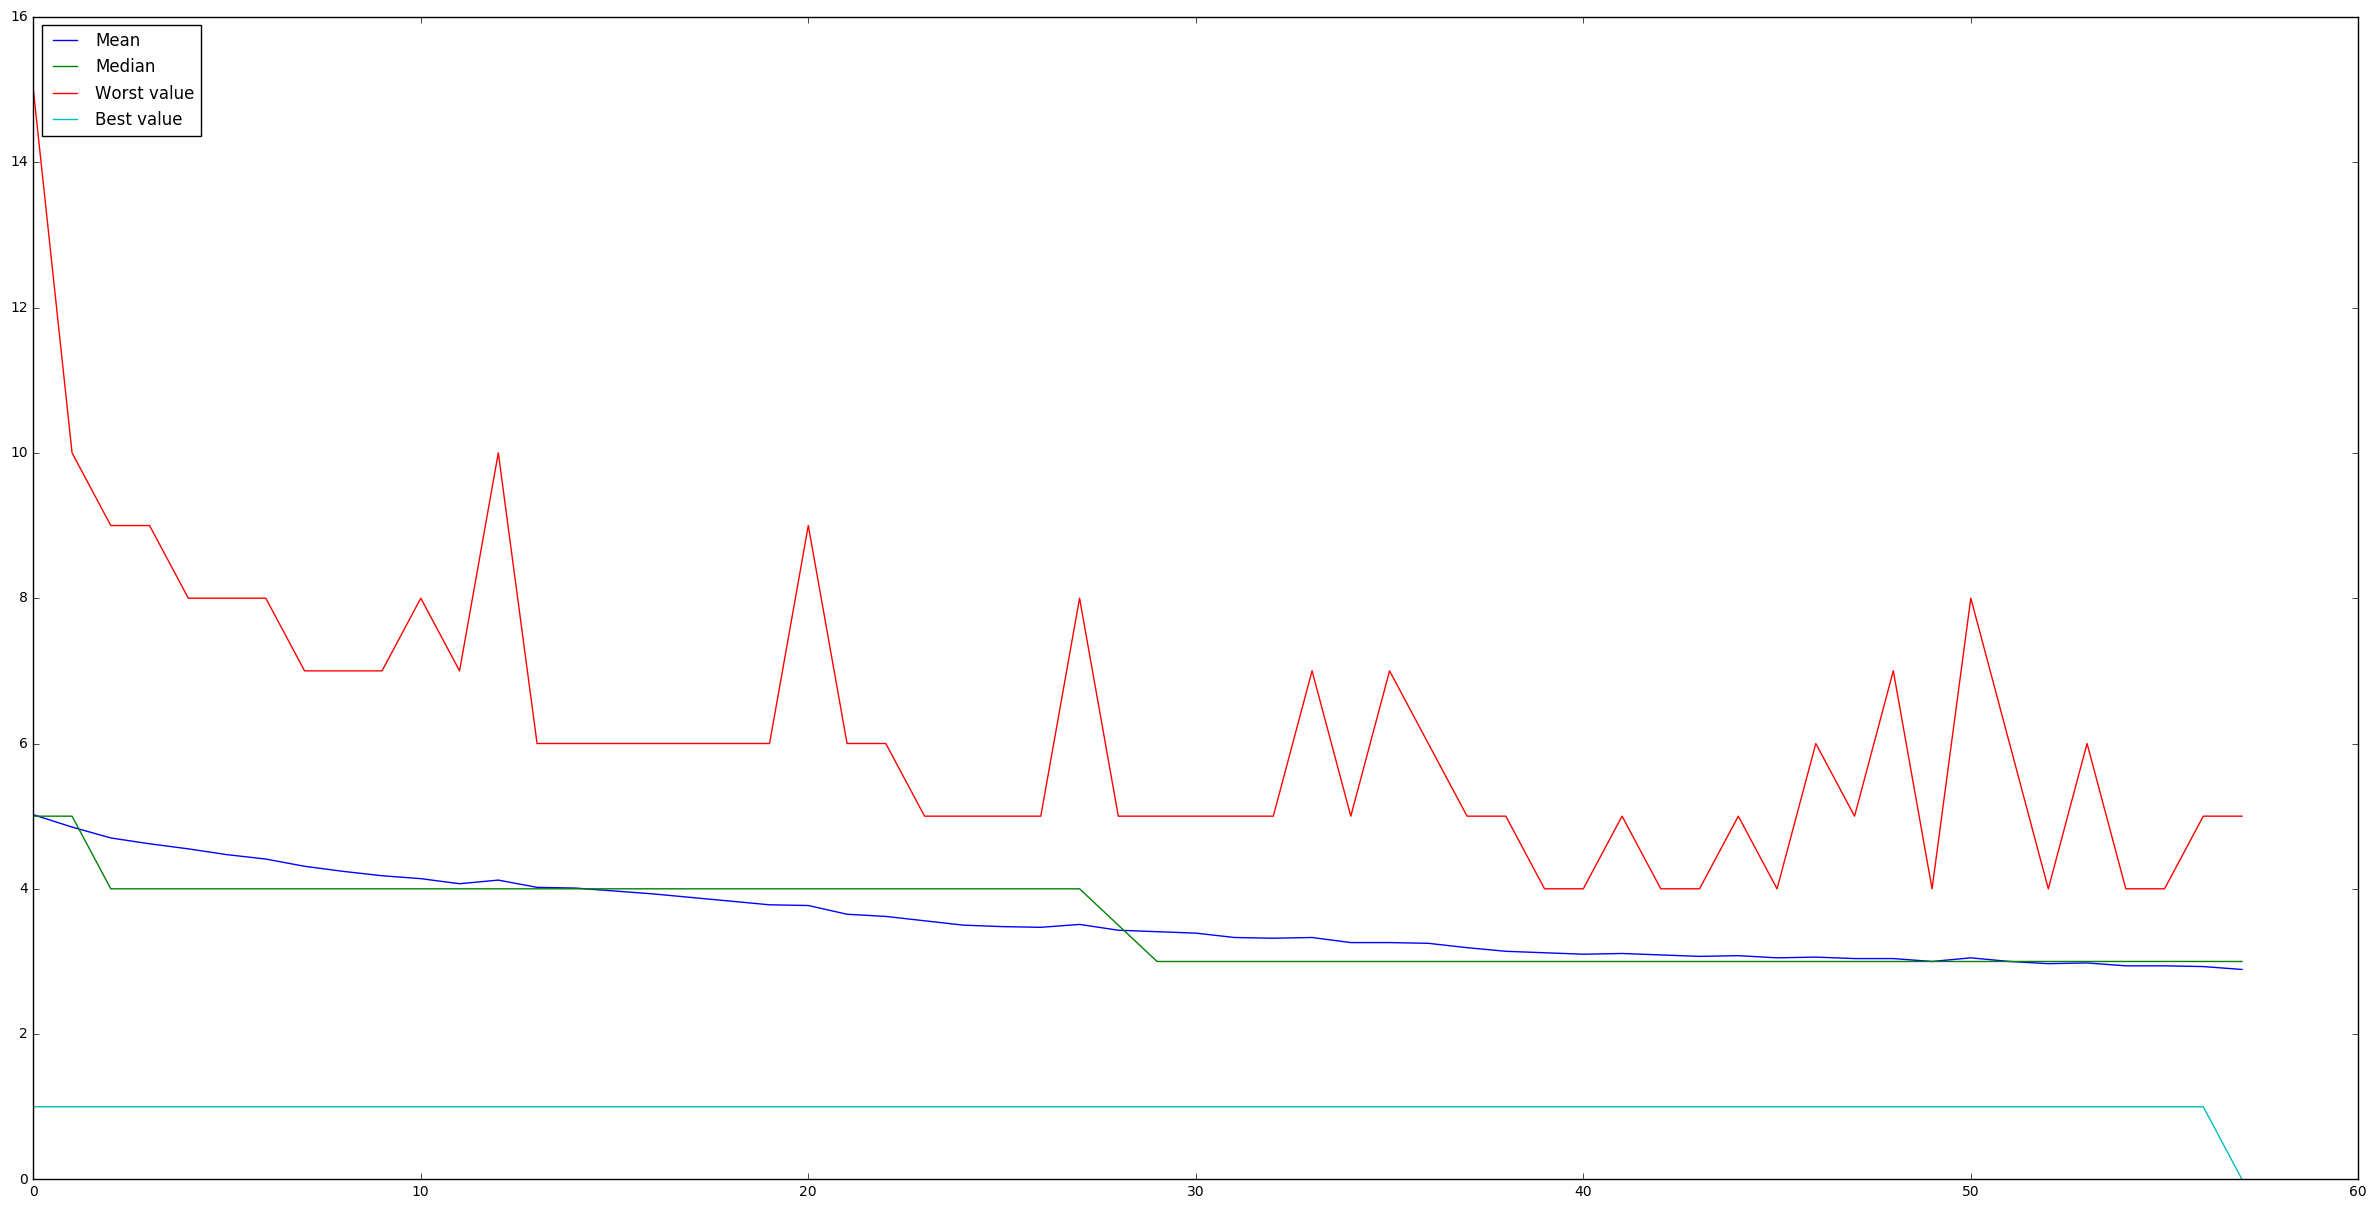

Wall time: 883 ms


In [29]:
%%time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Initalize vars
n_queens = 8
n_population = 100
n_iterations = 1000
mean = np.empty(0)
median = np.empty(0)
worst = np.empty(0)
best = np.empty(0)
# Create all the population 
population = initialization(n_population, n_queens)

# Iterate simulating the evolutionary process
for i in range(n_iterations):
    fitness = fitness_function(population)
    
    mean = np.append(mean, np.mean(fitness))
    median = np.append(median, np.median(fitness))
    worst = np.append(worst, np.max(fitness))
    best = np.append(best, np.min(fitness))
    print "Iteration", i, "Best", best[i], "Mean", mean[i], "Median", median[i], "Worst", worst[i]
    
    if best[i] == 0: break
    parents = select_gen(population)
    children = recombination(parents, n_queens)
    children = mutate_gen(children)
    population = replace_gen(population, children)
    fitness = fitness_function(population)

if i > 0:
    x = np.arange(0,i+1)
    plt.figure(1,[30, 15])
    plt.plot(x, mean)
    plt.plot(x, median)
    plt.plot(x, worst,)
    plt.plot(x, best)
    plt.legend(['Mean', 'Median', 'Worst value', 'Best value'], loc='upper left')

    plt.show()